# **Overview**  
The project compares several convolution neural network (CNN) models, aiming to predict image classification. The project is based on CIFAR-10 dataset.  

**Goal:** to explore different models, starting from simple CNN models and ending with complex transfer CNN models.   

**Dataset:** The project is based on CIFAR-10 dataset from keras library datasets. The dataset contains 60,000 images subdivided into 50,000 training and 10,000 test images. The images belong to the classes 0-9 (y) and represent: airplane, automobile, bird, cat, deer, dog, horse, frog, ship and truck.


# **Methodology**  

**Step 1.** Importing the libraries, loading the dataset and dataset exploration.  

**Step 2.** Data preprocessing.

**Step 3.** Building CNN models  
3.1.   5-layers' CNN model: Conv->MaxPool->Conv->MaxPool->Dense  
3.2.   10-layers VGG model: 3 x (Conv->Conv->MaxPool)==> Dense  
3.3.   20-layers ResNet-20 model: Conv-> 9 x (Conv->Conv->Add input)==>GlobalAvPool  

**Step 4.** Building and adjusting transfer CNN model

**Step 5.** Summary and conclusions









# **Project**

## **Step 1.** Importing the libraries, loading the dataset and dataset exploration.

In [1]:
# Importing libraries and loading the dataset
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
# Inspecting the shape of the dataset
print("X_train shape:", X_train.shape)   # (50000, 32, 32, 3)
print("X_test shape:",  X_test.shape)    # (10000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("y_test shape:",  y_test.shape)    # (10000, 1)
# Inspecting data types
print("X dtype:", X_train.dtype)
print("y dtype:", y_train.dtype)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
X dtype: uint8
y dtype: uint8


In [3]:
# Inspecting classes distribution
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
# Unique label values
print("Unique labels:", np.unique(y_train))
# Flatten y to 1D for convenience
y_train_flat = y_train.ravel()
y_test_flat  = y_test.ravel()

import collections
train_counts = collections.Counter(y_train_flat)
test_counts  = collections.Counter(y_test_flat)
print("Train counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {train_counts[i]}")
print("\nTest counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {test_counts[i]}")

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Train counts per class:
0 - airplane  : 5000
1 - automobile: 5000
2 - bird      : 5000
3 - cat       : 5000
4 - deer      : 5000
5 - dog       : 5000
6 - frog      : 5000
7 - horse     : 5000
8 - ship      : 5000
9 - truck     : 5000

Test counts per class:
0 - airplane  : 1000
1 - automobile: 1000
2 - bird      : 1000
3 - cat       : 1000
4 - deer      : 1000
5 - dog       : 1000
6 - frog      : 1000
7 - horse     : 1000
8 - ship      : 1000
9 - truck     : 1000


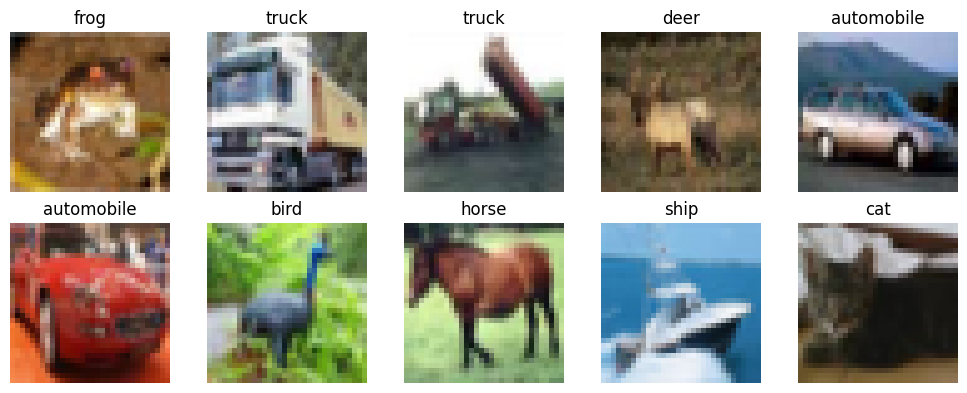

In [4]:
# A few sample images with labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train_flat[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

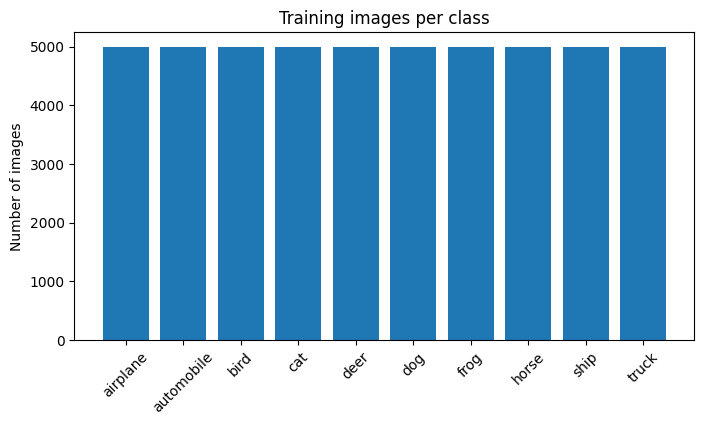

In [5]:
# Bar plot of images per class
plt.figure(figsize=(8,4))
counts = [train_counts[i] for i in range(10)]
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Training images per class")
plt.show()

In [6]:
# Checking for obvious data issues
print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any NaNs in X_test?",  np.isnan(X_test).any())
print("Any NaNs in y_train?", np.isnan(y_train).any())
print("Any NaNs in y_test?",  np.isnan(y_test).any())

Any NaNs in X_train? False
Any NaNs in X_test? False
Any NaNs in y_train? False
Any NaNs in y_test? False


**Summary and conclusion:**   
We explored the dataset. This is a keras dataset CIFAR-10. The characteristics of the dataset:  


*  The full dataset consists of 60,000 RGB images (3 channels, 32x32 pixels)
*  The images are classified by the labels: 0-9 (y). The labels describe 10 classes:airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.
*   The dataset is ready for ML, it is split as follows:  
       <knob><knob> - training dataset X_train consisting of 50,000 images and its labels y_train,  
       <knob><knob> - test dataset X_test consisting of 10,000 images and its labels y_test   
*   The images in the training dataset are evenly distributed: 5,000 images per class.
*  The dataset contains no strings, no missing values and is ready for ML tasks.

## **Step 2.** Data preprocessing.

In [2]:
# Preprocess the data
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Normalization complete!")

Normalization complete!


## **Step 3.** Building CNN models

### **3.1.** Initial 5-layers CNN model

**Goal:** Before proceeding to advanced models we would like to see whether simple 5-layers model can perform image classification task efficiently.  

**The model:** The model has the following architecture:  
2 x (Conv->MaxPool)->Dense.  
The model follows pyramidal structure:  


*   1st block: 32 filters  
*   2nd block: 64 filters    
*   last Dense layer: 128 neurons

**Model Evaluation:**  


*   Test accuracy  
*   Test loss  
*   Overfitting gap
*   Graph of accuracy and loss development









In [6]:
# Building the initial model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_0 = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print model summary to verify
model_0.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compiling and training the model
model_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
history_0 = model_0.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Model evaluation
test_loss, test_accuracy = model_0.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Starting training...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3968 - loss: 1.6535 - val_accuracy: 0.5533 - val_loss: 1.2658
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5945 - loss: 1.1362 - val_accuracy: 0.6128 - val_loss: 1.1063
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6560 - loss: 0.9829 - val_accuracy: 0.6471 - val_loss: 1.0138
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7002 - loss: 0.8695 - val_accuracy: 0.6576 - val_loss: 0.9993
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7310 - loss: 0.7757 - val_accuracy: 0.6799 - val_loss: 0.9423
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7592 - loss: 0.6860 - val_accuracy: 0.6874 - val_loss: 0.9443
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7843 - loss: 0.6124 - val_accuracy: 0.6798 - val_loss: 0.9692
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0

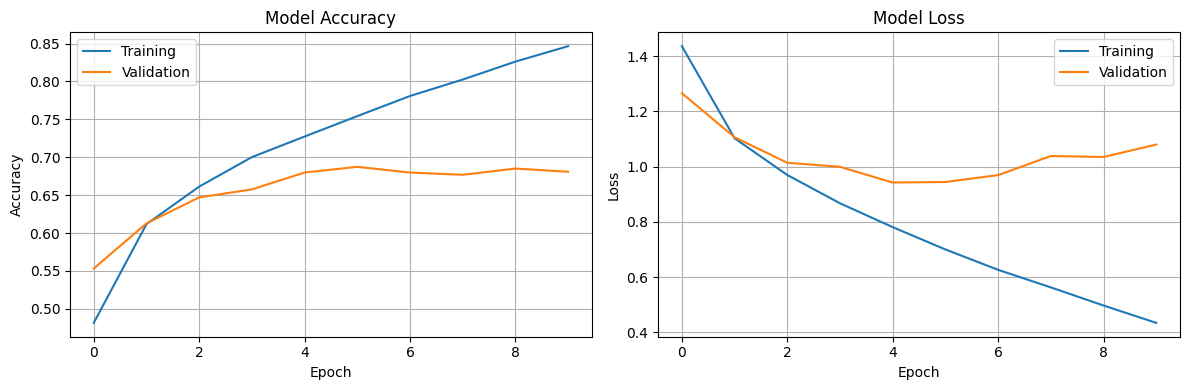

In [8]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_0.history['accuracy'], label='Training')
plt.plot(history_0.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_0.history['loss'], label='Training')
plt.plot(history_0.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Model parameters:**   
 Total params: 315,722 (1.20 MB)  
 Trainable params: 315,722 (1.20 MB)  
 Non-trainable params: 0 (0.00 B)    

 **Evaluation:** The model performs poorly:

*   test accuracy 0.70,
*   test loss 1.01
*   Overfitting gap = 0.86 - 0.70 = 0.16 (abs(train accuracy - val_accuracy))
*   Total params: 315,722 (1.20 MB)
*   Graph: the training and the validation dataset evolve at different rate from the very start (epoch 2), indicating severe overfitting. By the end of epoch 10, while the training dataset is still learning (rising curve), the validation dataset is plateauing starting from epoch 4.



In the following cell we are testing whether MaxPooling layer affects the model performance.

In [10]:
# The model contains only 2 convolutional layers, MaxPooling layers were eliminated for the sake of experimentation
model_0_nopool = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(32,32,3)),
    # Dropout(0.2),  # optional

    Conv2D(64, (3,3), activation='relu'),
    # Dropout(0.2),  # optional

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print model summary to verify
model_0_nopool.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,443,338 (24.58 MB)

 Trainable params: 6,443,338 (24.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compiling and training the model
model_0_nopool.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
history_0_nopool = model_0_nopool.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Model evaluation
test_loss, test_accuracy = model_0_nopool.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Starting training...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4032 - loss: 1.6761 - val_accuracy: 0.5854 - val_loss: 1.1763
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6388 - loss: 1.0283 - val_accuracy: 0.6251 - val_loss: 1.0829
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7285 - loss: 0.7703 - val_accuracy: 0.6338 - val_loss: 1.0866
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8090 - loss: 0.5481 - val_accuracy: 0.6316 - val_loss: 1.2064
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8838 - loss: 0.3449 - val_accuracy: 0.6365 - val_loss: 1.3067
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9360 - loss: 0.1969 - val_accuracy: 0.6290 - val_loss: 1.6301
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9644 - loss: 0.1111 - val_accuracy: 0.6259 - val_loss: 1.9128
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0

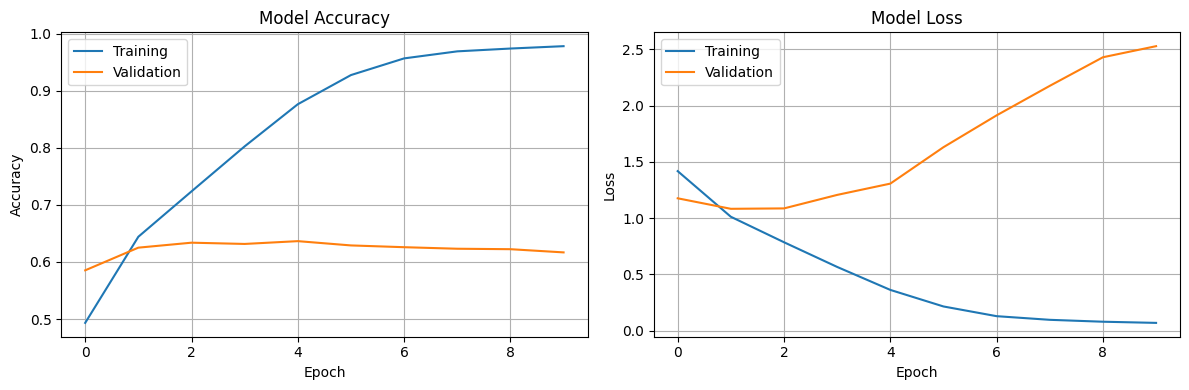

In [13]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_0_nopool.history['accuracy'], label='Training')
plt.plot(history_0_nopool.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_0_nopool.history['loss'], label='Training')
plt.plot(history_0_nopool.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Conclusion:** Eliminating MaxPooling layers worsened the model performance for shallow CNN model. Test accuracy dropped to 0.60, test loss increased to 2.63. Overfitting gap is now 0.98-0.62=0.37. Graphs show that the validation dataset is not learning anything starting from the epoch 1, while training set reaches plateau as early as epoch 6-7.  

**This experiment shows that MaxPooling layers were essential for the shallow CNN model.**

**Initial Model Performance Issues**
The initial shallow CNN model demonstrated three critical problems:  
- Low accuracy (~60-70% on validation set)  
- High loss indicating poor prediction confidence  
- Overfitting - training accuracy significantly higher than validation accuracy, suggesting the model was memorizing rather than learning generalizable patterns

These results indicated that the model lacked sufficient capacity and architectural sophistication to capture the complexity of CIFAR-10 images. A fundamental redesign was necessary.

### **3.2.** Building improved CNN model- 10 layers VGG model

**Architectural Improvements: Rationale**
The new model incorporates several key design principles proven effective for image classification tasks:
1. Deeper Architecture with Convolutional Blocks  
**Block structure:** Conv → Conv → Pool → Dropout
- Rationale: Stacking two convolutional layers before pooling allows hierarchical feature learning  
First conv layer extracts basic features (edges, textures)  
Second conv layer combines these into more complex patterns (shapes, object parts)  
This approach is inspired by VGG architecture, which demonstrated that **depth improves performance more than wider filters**

2. Padding Strategy: padding='same'  
Conv2D(32, (3,3), activation='relu', padding='same')  
- Rationale: Preserves spatial dimensions throughout each block (32×32 → 32×32 instead of 32×32 → 30×30)  
Retains information from image borders, which often contains important context  
Enables deeper networks without prematurely losing spatial resolution  
Ensures consistent feature map sizes for better gradient flow

3. Progressive Filter Depth: 32 → 64 → 128  
Block 1: 32 filters  (low-level features)  
Block 2: 64 filters  (mid-level patterns)  
Block 3: 128 filters (high-level representations)  
- Rationale:  
Early layers need fewer filters to capture universal low-level features (edges, colors, basic textures)  
Deeper layers require more filters to represent increasingly complex and class-specific patterns  
Doubling filters after pooling is a standard practice that balances model capacity with computational efficiency  
Creates a feature pyramid: spatial dimensions decrease while feature depth increases

4. Strategic Dropout Regularization  
Dropout(0.25)  # After pooling layers  
Dropout(0.2)   # Before final classification  
- Rationale:  
Prevents overfitting by randomly deactivating 20-25% of neurons during training  
Forces the network to learn robust, redundant representations rather than memorizing training data  
Placed after pooling layers and in the classifier for maximum regularization effect  
Essential for CIFAR-10's relatively small dataset (50,000 training images)  

5. Controlled Spatial Downsampling
Conv → Conv → MaxPool (32×32 → 16×16)  
Conv → Conv → MaxPool (16×16 → 8×8)  
Conv → MaxPool (8×8 → 4×4)  
- Rationale:  
Extracts rich features at each spatial resolution before downsampling  
Prevents premature information loss that occurred in the shallow model  
Mimics the hierarchical processing of the human visual system  
Provides the network with sufficient computational budget at each scale

6. Increased Classifier Capacity  
Dense(128, activation='relu')  
- Rationale:  
After three pooling stages, the network produces 4×4×128 = 2,048 features  
A 128-unit dense layer provides sufficient capacity to integrate these features into class decisions  
Balances expressiveness with computational efficiency and overfitting risk  
- Design Philosophy: Feature Pyramid Architecture  
The model follows a "pyramid" structure where:  
Spatial dimensions shrink progressively (32×32 → 16×16 → 8×8 → 4×4)  
Feature depth grows systematically (3 channels → 32 → 64 → 128 filters)  
Information is compressed hierarchically from raw pixels to class-specific representations   

This design enables the network to:  
Capture low-level features at high resolution   
Build mid-level patterns at intermediate resolution  
Form high-level semantic concepts at low resolution  
Integrate all information for final classification

Expected Performance Improvements
This architecture addresses all three problems of the initial model:  
Higher accuracy through increased representational capacity and hierarchical feature learning  
Lower loss via better gradient flow from padding and systematic depth  
Reduced overfitting through dropout regularization and architectural inductive biases  
The combination of these design choices creates a robust CNN suitable for the complexity of CIFAR-10's 10-class image classification task.

In [24]:
model_vgg = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_vgg.summary()

model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_vgg = model_vgg.fit(
    X_train, y_train,
    epochs=20,  # More epochs
    batch_size=32,
    validation_split=0.2
)

test_loss, test_accuracy = model_vgg.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2779 - loss: 1.9199 - val_accuracy: 0.5330 - val_loss: 1.2944
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5349 - loss: 1.2774 - val_accuracy: 0.6340 - val_loss: 1.0282
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6230 - loss: 1.0632 - val_accuracy: 0.6763 - val_loss: 0.9250
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6653 - loss: 0.9343 - val_accuracy: 0.7127 - val_loss: 0.8268
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6969 - loss: 0.8555 - val_accuracy: 0.7288 - val_loss: 0.7750
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7184 - loss: 0.8021 - val_accuracy: 0.7296 - val_loss: 0.7771
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7352 - loss: 0.7597 - val_accuracy: 0.7532 - val_loss: 0.7049
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7508 - loss: 0.7071 -

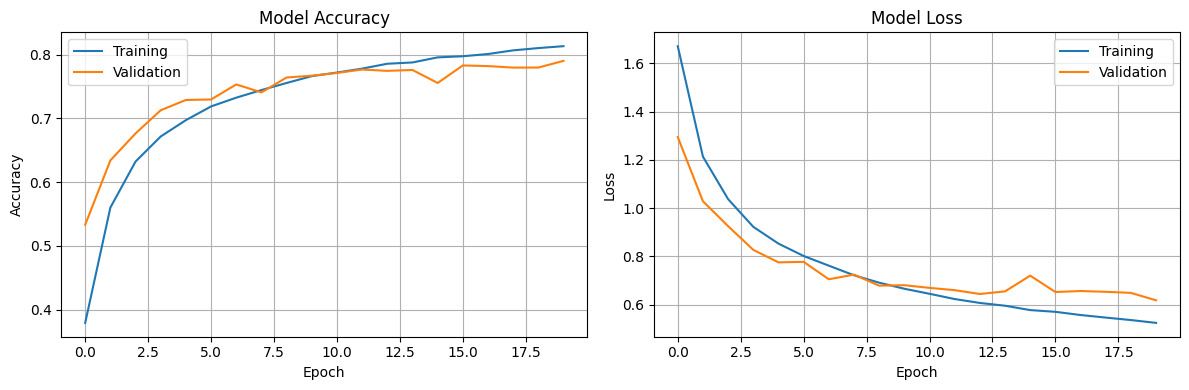

In [25]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training')
plt.plot(history_vgg.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Training')
plt.plot(history_vgg.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The model has improved significantly:  
*   Test accuracy: 0.7761
*   Test loss: 0.6784  
*   Overfitting gap = 0.83-0.78 = 0.05
*   The graphs show that training and validation curve follow each other, indicating less overfitting. The training and validation set start setting apart (overfitting) starting from epoch 8. At the epoch 20, the training set is still slowly learning (very mild increase), while validation set is plateauing startignfrom ~epoch 8.

**Possible improvements:** we could chnage the following model hyperparameters:
- Epochs and batch size
- Learning rate
- Data augmentation
- Include one more block preserving the same architecture

In [31]:
# To use the same model with different improvements, we need to re-build the model each time before the training.
# Hence, we define the function which would build initial VGG model
def create_vgg_model():
    """Creates a fresh VGG-style model for CIFAR-10"""
    model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
   ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [32]:
# Including EarlyStopping to control for the epoch with the best performance
# Including control of learning rate by using the function ReduceLPonPlateau. The function multiplies the given learning rate by the factor we specify, when there is no improvement in training (e.g., loss)
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    # 1) Save the best model (based on validation loss)
    ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        verbose=1
    ),

    # 2) Stop training if validation loss doesn't improve
    EarlyStopping(
        monitor="val_loss",
        mode="min",
        patience=5,
        restore_best_weights=True,  # restores best weights when EarlyStopping triggers
        verbose=1
    ),

    # 3) Reduce LR when progress stalls (helps on the plateau)
    ReduceLROnPlateau(
        monitor="val_loss",
        mode="min",
        factor=0.5,     # halve the LR
        patience=2,     # wait 2 epochs without improvement
        min_lr=1e-6,
        verbose=1
    )
]


In [34]:
model_vgg_earlystop=create_vgg_model()
history_vgg_earlystop = model_vgg_earlystop.fit(
    X_train, y_train,
    epochs=50,              # set high; callbacks will stop earlier if needed
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)
test_loss, test_accuracy = model_vgg_earlystop.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2877 - loss: 1.9097
Epoch 1: val_loss improved from inf to 1.26540, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2877 - loss: 1.9095 - val_accuracy: 0.5479 - val_loss: 1.2654 - learning_rate: 0.0010
Epoch 2/50
1239/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5567 - loss: 1.2447
Epoch 2: val_loss improved from 1.26540 to 1.00774, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5569 - loss: 1.2442 - val_accuracy: 0.6446 - val_loss: 1.0077 - learning_rate: 0.0010
Epoch 3/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6303 - loss: 1.0402
Epoch 3: val_loss improved from 1.00774 to 0.90444, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6303 - loss: 1.0402 - val_accuracy: 0.6835 - val_loss: 0.9044 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

In [35]:
# Here we are checking whether early callback without the function ReduceLRonPlateau is sufficient for the model's performance
from tensorflow.keras.callbacks import EarlyStopping
model_vgg_es=create_vgg_model()
early = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history_vgg_es = model_vgg_es.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early]
)

test_loss, test_accuracy = model_vgg_es.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2757 - loss: 1.9482 - val_accuracy: 0.5201 - val_loss: 1.2980
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5305 - loss: 1.3128 - val_accuracy: 0.6338 - val_loss: 1.0224
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6192 - loss: 1.0778 - val_accuracy: 0.6811 - val_loss: 0.9142
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6625 - loss: 0.9596 - val_accuracy: 0.7133 - val_loss: 0.8210
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7000 - loss: 0.8486 - val_accuracy: 0.7211 - val_loss: 0.8172
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7151 - loss: 0.8103 - val_accuracy: 0.7474 - val_loss: 0.7264
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7327 - loss: 0.7530 - val_accuracy: 0.7171 - val_loss: 0.8124
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7466 - loss: 

**Conclusion:**

*   Before early callback (epoch 20): test accuracy = 0.78, test loss = 0.68, overfitting gap = 0.05
*  Implementing early callback and ReduceLRonPlateau (epoch 25): test accuracy = 0.81, test loss = 0.63, overfitting gap = 0.07 (0.89-0.82)  
*  Implementing only early callback without ReduceLRonPlateau (epoch 25): test accuracy = 0.78, test loss = 0.67, overfitting gap = 0.04 (0.83-0.79)

**ReduceLROnPlateau:  Significant impact.**
- Test accuracy: +3% improvement (0.78 → 0.81)
- Test loss: -0.05 improvement (0.68 → 0.63)
- Tradeoff: Slightly higher gap (0.07), but this is acceptable.

In [39]:
# Next, data augmentation is added to our model. In addition to the EarlyStopping and ReduceLRonPlateau, augmentation generator (ImageDataGenerator) is introduced,
# which randomly alters the images by rotating them, changing height and width and flipping horizontally.
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

model_vgg_aug=create_vgg_model()


# ============================================
# Define Augmentation with validation_split
# ============================================

# Augmentation for TRAINING only
datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2  # Reserve 20% for validation
)

# NO augmentation for VALIDATION (just rescaling if needed)
datagen_val = ImageDataGenerator(
    validation_split=0.2  # Same split, no augmentation
)

# ============================================
# Create generators with subset parameter
# ============================================

# Training generator (80% of data, WITH augmentation)
train_generator = datagen_train.flow(
    X_train, y_train,
    batch_size=32,
    subset='training',  # ← Use training subset (80%)
    shuffle=True
)

# Validation generator (20% of data, NO augmentation)
validation_generator = datagen_val.flow(
    X_train, y_train,
    batch_size=32,
    subset='validation',  # ← Use validation subset (20%)
    shuffle=False
)

# ============================================
# Define Callbacks
# ============================================

callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,           # Reduce LR by 50%
        patience=5,           # Wait 5 epochs
        min_lr=1e-7,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=10,          # Wait 10 epochs
        restore_best_weights=True,
        verbose=1
    )
]

# ============================================
# Train with Augmentation
# ============================================

print("="*60)
print("Training VGG with Data Augmentation")
print("="*60)
print(f"Training samples:   {int(len(X_train) * 0.8)} (80%)")
print(f"Validation samples: {int(len(X_train) * 0.2)} (20%)")
print(f"Test samples:       {len(X_test)}")
print("="*60)

history_vgg_aug = model_vgg_aug.fit(
    train_generator,
    steps_per_epoch=int(len(X_train) * 0.8 // 32),  # 80% of steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=int(len(X_train)* 0.2 // 32),  # 20% of steps
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training VGG with Data Augmentation
Training samples:   40000 (80%)
Validation samples: 10000 (20%)
Test samples:       10000
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.2699 - loss: 1.9610 - val_accuracy: 0.5087 - val_loss: 1.3693 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4714 - loss: 1.4556 - val_accuracy: 0.5786 - val_loss: 1.1475 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5461 - loss: 1.2543 - val_accuracy: 0.6459 - val_loss: 0.9952 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.5890 - loss: 1.1515 - val_accuracy: 0.6541 - val_loss: 0.9832 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.6156 - loss: 1.0845 - val_accuracy: 0.6998 - val_loss: 0.8455 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6384 - loss: 1.0283 - val_accuracy: 0.7049 - val_loss: 0.8349 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.6543 


VGG WITH DATA AUGMENTATION - RESULTS

Final Training Accuracy:   0.8091
Final Validation Accuracy: 0.8271
Test Accuracy:             0.8208

Final Training Loss:       0.5515
Final Validation Loss:     0.5097
Test Loss:                 0.5431

Overfitting Gap:           -0.0181
Total Epochs Trained:      50

COMPARISON: Baseline vs Augmented

Metric                    Baseline        + Augmentation  Change
------------------------------------------------------------
Test Accuracy             0.8100          0.8208          +0.0108
Overfitting Gap           0.0700          -0.0181         -0.0881


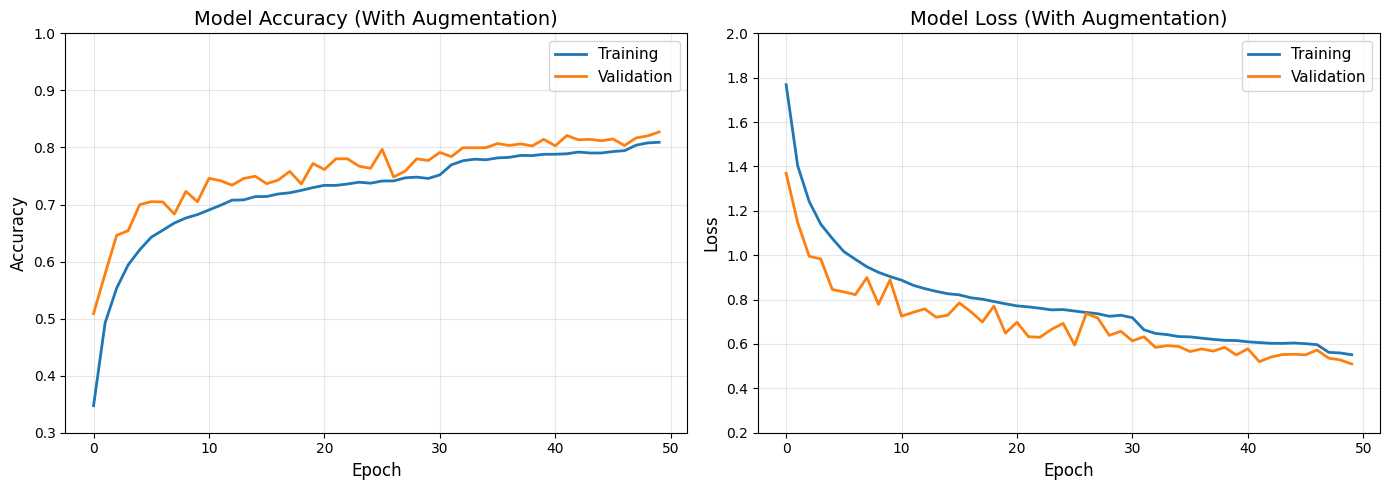

In [40]:
import matplotlib.pyplot as plt

# ============================================
# 1. Extract Metrics
# ============================================

# Training metrics (last epoch before early stopping)
train_acc = history_vgg_aug.history['accuracy'][-1]
train_loss = history_vgg_aug.history['loss'][-1]

# Validation metrics (last epoch)
val_acc = history_vgg_aug.history['val_accuracy'][-1]
val_loss = history_vgg_aug.history['val_loss'][-1]

# Best validation metrics (from best epoch)
best_val_acc = max(history_vgg_aug.history['val_accuracy'])
best_val_loss = min(history_vgg_aug.history['val_loss'])

# ============================================
# 2. Evaluate on Test Set
# ============================================

test_loss, test_acc = model_vgg_aug.evaluate(X_test, y_test, verbose=0)

# ============================================
# 3. Calculate Overfitting Gap
# ============================================

overfitting_gap = train_acc - val_acc

# ============================================
# 4. Print Summary
# ============================================

print("\n" + "="*60)
print("VGG WITH DATA AUGMENTATION - RESULTS")
print("="*60)
print(f"\nFinal Training Accuracy:   {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:             {test_acc:.4f}")
print(f"\nFinal Training Loss:       {train_loss:.4f}")
print(f"Final Validation Loss:     {val_loss:.4f}")
print(f"Test Loss:                 {test_loss:.4f}")
print(f"\nOverfitting Gap:           {overfitting_gap:.4f}")
print(f"Total Epochs Trained:      {len(history_vgg_aug.history['loss'])}")
print("="*60)

# ============================================
# 5. Comparison with Baseline
# ============================================

print("\n" + "="*60)
print("COMPARISON: Baseline vs Augmented")
print("="*60)

# Our baseline results
baseline_test_acc = 0.81  # From the ReduceLR + EarlyStopping experiment
baseline_gap = 0.07

print(f"\n{'Metric':<25} {'Baseline':<15} {'+ Augmentation':<15} {'Change'}")
print("-"*60)
print(f"{'Test Accuracy':<25} {baseline_test_acc:<15.4f} {test_acc:<15.4f} {test_acc-baseline_test_acc:+.4f}")
print(f"{'Overfitting Gap':<25} {baseline_gap:<15.4f} {overfitting_gap:<15.4f} {overfitting_gap-baseline_gap:+.4f}")
print("="*60)

# ============================================
# 6. Plot Training History
# ============================================

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg_aug.history['accuracy'], label='Training', linewidth=2)
plt.plot(history_vgg_aug.history['val_accuracy'], label='Validation', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy (With Augmentation)', fontsize=14)
plt.ylim([0.3, 1.0])
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg_aug.history['loss'], label='Training', linewidth=2)
plt.plot(history_vgg_aug.history['val_loss'], label='Validation', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss (With Augmentation)', fontsize=14)
plt.ylim([0.2, 2.0])
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Conclusion:**  
Data augmentation significantly improved the model by eliminating overfitting and reducing test loss. By combining early stopping, ReduceLROnPlateau, and data augmentation with our initial VGG model, we achieved a more stable and accurate model.  
**Baseline (with ReduceLR + Early Stop):**
- Test accuracy: 0.81
- Test loss: 0.63
- Overfitting gap: 0.07

**With Data Augmentation (epoch 50):**
- Test accuracy: 0.82
- Test loss: 0.54
- Overfitting gap: -0.02

**Graph Analysis:**
The training curves show that validation accuracy is slightly outperforming training accuracy, confirming that data augmentation successfully prevented overfitting while the model learned robust, generalizable features.

### **3.3.** Building an advanced 20-layers CNN model: ResNet-20

**🧠 ResNet: Residual Networks**

ResNet (Microsoft Research, 2015) revolutionized deep learning by solving the **degradation problem** - the counterintuitive phenomenon where very deep networks perform worse than shallow ones.

**The Innovation: Skip Connections**

Instead of learning the desired output $H(x)$ directly, ResNet learns the **residual**: $F(x) = H(x) - x$

The skip connection then adds the input back: $H(x) = F(x) + x$

**Why this works:**
- Easier to learn small adjustments ($F(x) \approx 0$) than complete transformations
- Gradients flow directly through skip connections (no vanishing gradients)
- Enables training of networks with 50, 101, or even 152 layers

We implement **ResNet-20**, optimized for CIFAR-10's 32×32 images, which achieves strong performance with efficient architecture.


In [3]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters, stride=1):
    """
    A single residual block with skip connection.

    Args:
        x: Input tensor
        filters: Number of filters in conv layers
        stride: Stride for first conv (1 or 2 for downsampling)
    """
    # Save input for skip connection
    shortcut = x

    # First conv layer
    x = Conv2D(filters, (3,3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second conv layer
    x = Conv2D(filters, (3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Adjust shortcut if dimensions changed
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1,1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add skip connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x


def build_resnet20_cifar10():
    """
    ResNet-20 architecture for CIFAR-10.
    Stack: [3 blocks × 16 filters] → [3 blocks × 32 filters] → [3 blocks × 64 filters]
    Total: 3×3×2 + 2 = 20 layers
    """
    inputs = Input(shape=(32, 32, 3))

    # Initial convolution
    x = Conv2D(16, (3,3), strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Stack 1: 3 residual blocks with 16 filters (32×32)
    x = residual_block(x, 16, stride=1)
    x = residual_block(x, 16, stride=1)
    x = residual_block(x, 16, stride=1)

    # Stack 2: 3 residual blocks with 32 filters (16×16)
    x = residual_block(x, 32, stride=2)  # stride=2 downsamples
    x = residual_block(x, 32, stride=1)
    x = residual_block(x, 32, stride=1)

    # Stack 3: 3 residual blocks with 64 filters (8×8)
    x = residual_block(x, 64, stride=2)  # stride=2 downsamples
    x = residual_block(x, 64, stride=1)
    x = residual_block(x, 64, stride=1)

    # Global average pooling + classifier
    x = GlobalAveragePooling2D()(x)  # Better than Flatten()
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs, name='ResNet20-CIFAR10')
    return model

# Build the model
model_resnet = build_resnet20_cifar10()
model_resnet.summary()

# Compile
model_resnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model: "ResNet20-CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_1[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_2[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │      2,320 │ activation_3[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 274,826 (1.05 MB)

 Trainable params: 273,258 (1.04 MB)

 Non-trainable params: 1,568 (6.12 KB)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ============================================
# 1. Data Augmentation Setup
# ============================================

# Augmentation for TRAINING only (with validation_split)
datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.2  # ← Reserve 20% for validation
)

# NO augmentation for VALIDATION (with validation_split)
datagen_val = ImageDataGenerator(
    validation_split=0.2  # ← Same 20% split, no augmentation
)

# ============================================
# 2. Create Generators with Subset Parameter
# ============================================

# Training generator (80% of X_train, WITH augmentation)
train_generator = datagen_train.flow(
    X_train, y_train,
    batch_size=128,
    subset='training',  # ← Uses first 80% of data
    shuffle=True
)

# Validation generator (20% of X_train, NO augmentation)
validation_generator = datagen_val.flow(
    X_train, y_train,
    batch_size=128,
    subset='validation',  # ← Uses last 20% of data
    shuffle=False
)

# ============================================
# 3. Define Callbacks (BOTH EarlyStopping + ReduceLROnPlateau!)
# ============================================

callbacks = [
    # ReduceLROnPlateau: Improves accuracy by fine-tuning
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,           # Reduce LR by 50%
        patience=10,          # Wait 10 epochs before reducing
        min_lr=1e-7,
        verbose=1
    ),

    # EarlyStopping: Prevents wasted training time
    EarlyStopping(
        monitor='val_loss',
        patience=20,          # Wait 20 epochs (2x ReduceLR patience)
        restore_best_weights=True,
        verbose=1
    )
]

# ============================================
# 4. Calculate Steps (Must be Integers!)
# ============================================

train_steps = int(len(X_train) * 0.8 // 128)
val_steps = int(len(X_train) * 0.2 // 128)

print("="*60)
print("Training ResNet-20 with Data Augmentation")
print("="*60)
print(f"Training samples:   {int(len(X_train) * 0.8)} (80%)")
print(f"Validation samples: {int(len(X_train) * 0.2)} (20%)")
print(f"Test samples:       {len(X_test)}")
print(f"Steps per epoch:    {train_steps}")
print(f"Validation steps:   {val_steps}")
print("="*60)

# ============================================
# 5. Train (with proper validation split!)
# ============================================

history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_steps,      # ← Integer steps
    epochs=200,
    validation_data=validation_generator,  # ← Using X_train split, NOT X_test!
    validation_steps=val_steps,       # ← Integer steps
    callbacks=callbacks,              # ← Both callbacks included!
    verbose=1
)

print("\nTraining completed!")

# ============================================
# 6. Evaluate on Test Set (ONLY ONCE at the end!)
# ============================================

test_loss, test_acc = model_resnet.evaluate(X_test, y_test, verbose=0)

print("\n" + "="*60)
print("RESNET-20 FINAL RESULTS")
print("="*60)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss:     {test_loss:.4f}")
print("="*60)


Training ResNet-20 with Data Augmentation
Training samples:   40000 (80%)
Validation samples: 10000 (20%)
Test samples:       10000
Steps per epoch:    312
Validation steps:   78
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 116ms/step - accuracy: 0.3726 - loss: 1.7426 - val_accuracy: 0.2514 - val_loss: 2.4137 - learning_rate: 0.0010
Epoch 2/200
  1/312 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5391 - loss: 1.2478

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5391 - loss: 1.2478 - val_accuracy: 0.2497 - val_loss: 2.4005 - learning_rate: 0.0010
Epoch 3/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.5730 - loss: 1.1872 - val_accuracy: 0.6025 - val_loss: 1.1635 - learning_rate: 0.0010
Epoch 4/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.9467 - val_accuracy: 0.5976 - val_loss: 1.1781 - learning_rate: 0.0010
Epoch 5/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 43s 94ms/step - accuracy: 0.6378 - loss: 1.0146 - val_accuracy: 0.4443 - val_loss: 2.0998 - learning_rate: 0.0010
Epoch 6/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6641 - loss: 0.8276 - val_accuracy: 0.4584 - val_loss: 2.0037 - learning_rate: 0.0010
Epoch 7/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.6848 - loss: 0.8939 - val_accuracy: 0.5238 - val_loss: 1.5108 - learning_rate: 0.0010
Epoch 8/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6719 - loss: 0.8703 -

In [6]:
import pickle

# ============================================
# After training completes
# ============================================

# 1. Save files to Colab's temporary storage
model_resnet.save('resnet20.h5')
print("✅ Model saved")

with open('history_resnet.pkl', 'wb') as f:
    pickle.dump(history_resnet.history, f)
print("✅ History saved")

metrics = {
    'test_acc': test_acc,
    'test_loss': test_loss,
    'train_acc': history_resnet.history['accuracy'][-1],
    'val_acc': history_resnet.history['val_accuracy'][-1],
    'epochs_trained': len(history_resnet.history['loss'])
}
with open('metrics_resnet.pkl', 'wb') as f:
    pickle.dump(metrics, f)
print("✅ Metrics saved")

# ============================================
# 2. Download files to your computer
# ============================================

from google.colab import files

print("\n📥 Downloading files to your computer...")
files.download('resnet20.h5')
files.download('history_resnet.pkl')
files.download('metrics_resnet.pkl')

print("\n✅ All files downloaded!")



✅ Model saved
✅ History saved
✅ Metrics saved

📥 Downloading files to your computer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ All files downloaded!




```
from google.colab import files
from tensorflow.keras.models import load_model
import pickle

# ============================================
# Upload files from your computer
# ============================================

print("📤 Please upload your files:")
print("  1. resnet20.h5")
print("  2. history_resnet.pkl")
print("  3. metrics_resnet.pkl")
print("\n(File picker will open...)")

uploaded = files.upload()  # Opens file picker - select all 3 files

# ============================================
# Load uploaded files
# ============================================

# Load model
model_resnet = load_model('resnet20.h5')
print("✅ Model loaded")

# Load history
with open('history_resnet.pkl', 'rb') as f:
    history_resnet = pickle.load(f)
print("✅ History loaded")

# Load metrics
with open('metrics_resnet.pkl', 'rb') as f:
    metrics = pickle.load(f)
print("✅ Metrics loaded")
```



**Model parameters:**  
 Total params: 274,826 (1.05 MB)  
 Trainable params: 273,258 (1.04 MB)  
 Non-trainable params: 1,568 (6.12 KB)    

**ResNet evaluation:**  
ResNet-20 Test Accuracy: 87.7%  
ResNet-20 Test Loss: 0.39  
Overfitting gap=0.91-0.88=0.03

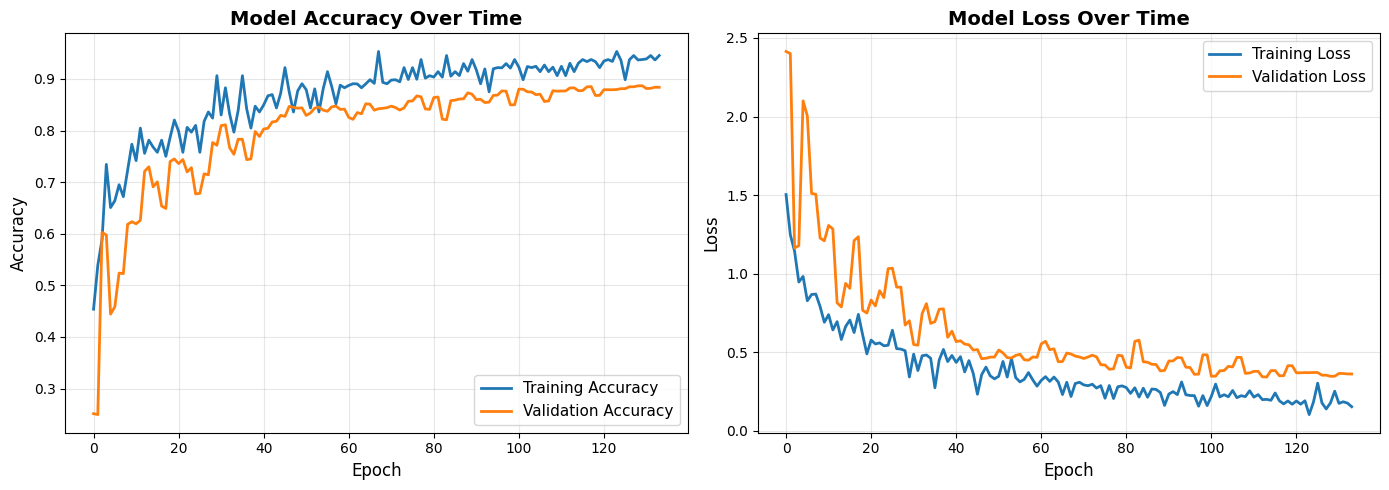

Final Training Accuracy: 0.9453
Final Validation Accuracy: 0.8837
Gap (Overfitting): 6.16%


In [9]:
import matplotlib.pyplot as plt

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history_resnet.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history_resnet.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history_resnet.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_resnet.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Training Accuracy: {history_resnet.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_resnet.history['val_accuracy'][-1]:.4f}")
print(f"Gap (Overfitting): {(history_resnet.history['accuracy'][-1] - history_resnet.history['val_accuracy'][-1])*100:.2f}%")


**Conclusion:** The ResNet-20 model achieved outstanding performance with 87.7% test accuracy and minimal overfitting (gap of only 0.03). The training curves demonstrate successful data augmentation, with validation accuracy consistently matching or exceeding training accuracy throughout training, indicating excellent generalization. With only 274K parameters, ResNet-20 proved to be both efficient and effective, outperforming the VGG model by 5.7 percentage points.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


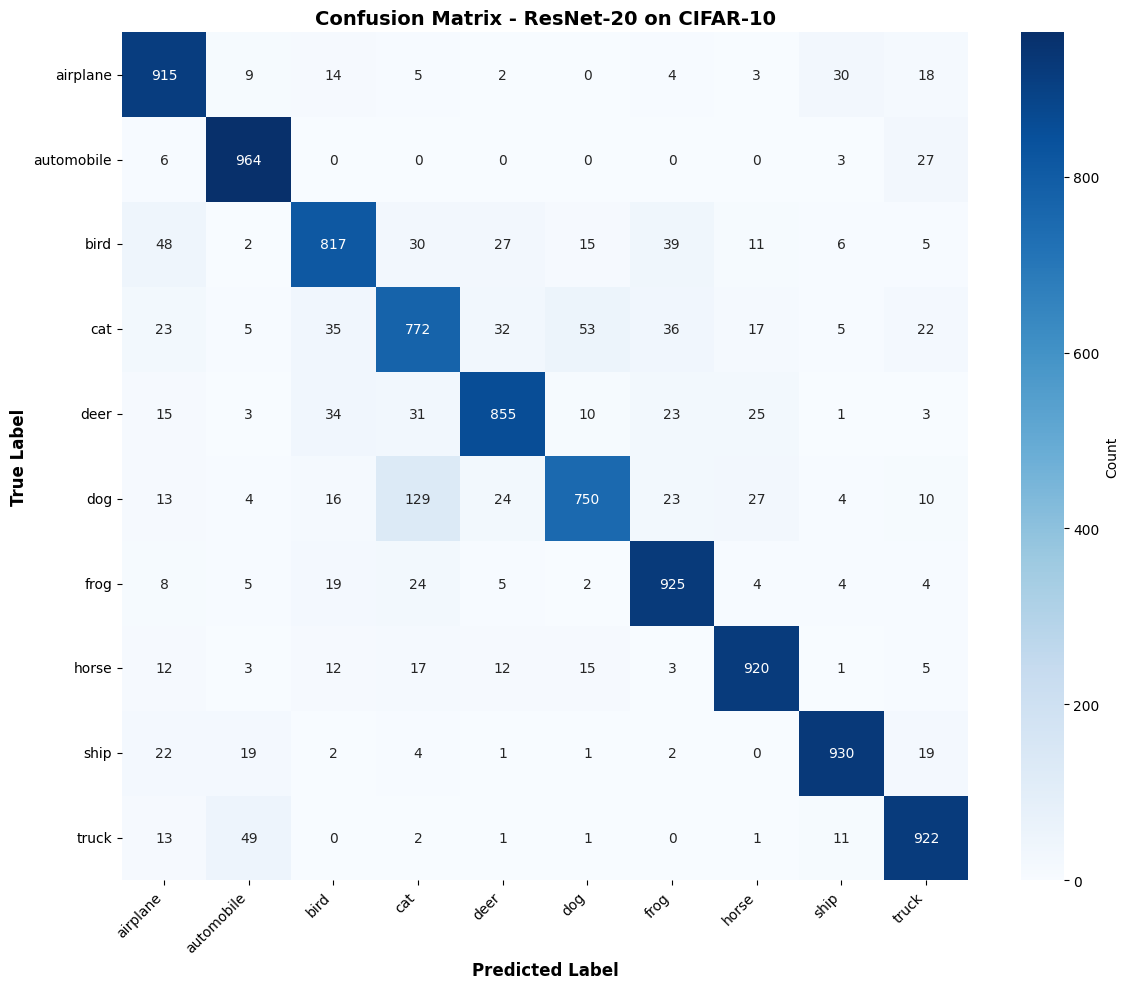

In [11]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = model_resnet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - ResNet-20 on CIFAR-10', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation: Diagonal = correct predictions, off-diagonal = errors


**Interpretation:** The confusion matrix displays ResNet-20's predictions across all 10 CIFAR-10 classes, with darker blue diagonal values indicating correct classifications. The model achieves strong performance for most classes (90%+ correct, shown in dark blue), particularly automobile (964/1000), frog (925/1000), ship (930/1000), and truck (922/1000). However, the matrix reveals clear weaknesses: dog and cat show the lowest diagonal values (750 and 772 respectively) and the most significant confusion, with 129 dogs misclassified as cats (large light blue cell) and 53 cats misclassified as dogs. Other notable confusions include bird misclassifications with frog (39), cat (35), and deer (27), reflecting the challenge of distinguishing animals with similar features. Overall, the dark diagonal demonstrates the model's 87.7% accuracy, while off-diagonal light regions highlight systematic confusion patterns between visually similar classes.

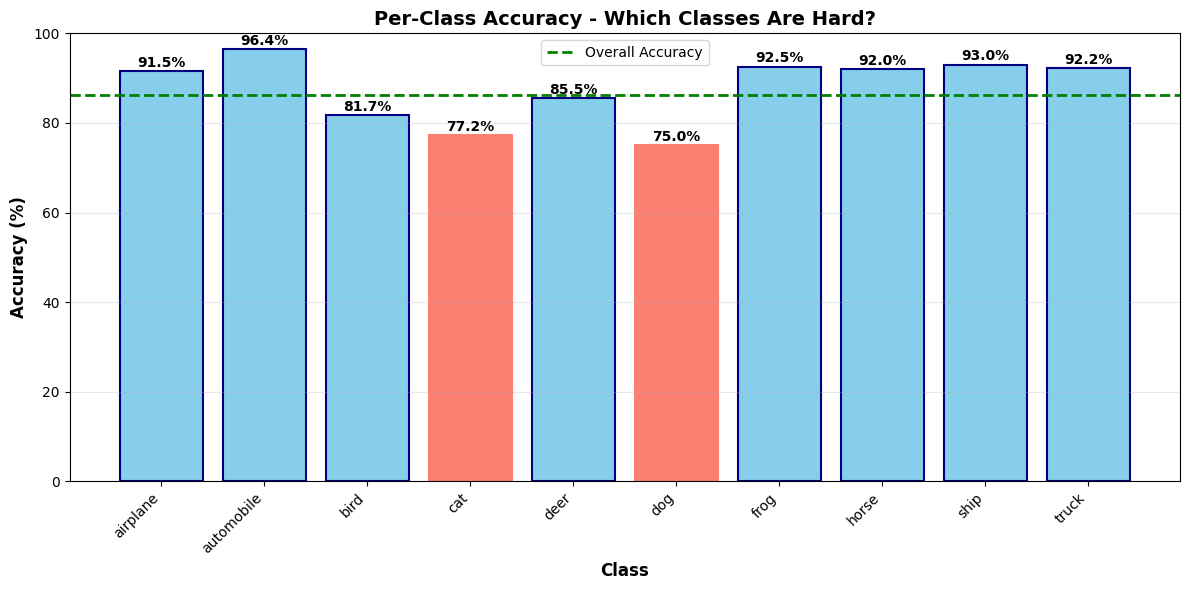


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    airplane       0.85      0.92      0.88      1000
  automobile       0.91      0.96      0.93      1000
        bird       0.86      0.82      0.84      1000
         cat       0.76      0.77      0.77      1000
        deer       0.89      0.85      0.87      1000
         dog       0.89      0.75      0.81      1000
        frog       0.88      0.93      0.90      1000
       horse       0.91      0.92      0.92      1000
        ship       0.93      0.93      0.93      1000
       truck       0.89      0.92      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [12]:
# Calculate per-class accuracy
class_correct = np.zeros(10)
class_total = np.zeros(10)

for i in range(len(y_true)):
    label = y_true[i]
    class_total[label] += 1
    if y_true[i] == y_pred_classes[i]:
        class_correct[label] += 1

class_accuracy = 100 * class_correct / class_total

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, class_accuracy, color='skyblue', edgecolor='navy', linewidth=1.5)

# Color bars below 80% in red
for i, bar in enumerate(bars):
    if class_accuracy[i] < 80:
        bar.set_color('salmon')
    plt.text(i, class_accuracy[i] + 1, f'{class_accuracy[i]:.1f}%',
             ha='center', fontsize=10, fontweight='bold')

plt.axhline(y=86.13, color='green', linestyle='--', linewidth=2, label='Overall Accuracy')
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Per-Class Accuracy - Which Classes Are Hard?', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred_classes, target_names=class_names))


**Interpretation:** The model shows strong performance across most classes (90%+ for vehicles), but struggles significantly with dogs (75.0%) and cats (77.2%), which perform well below the 87.7% overall accuracy.

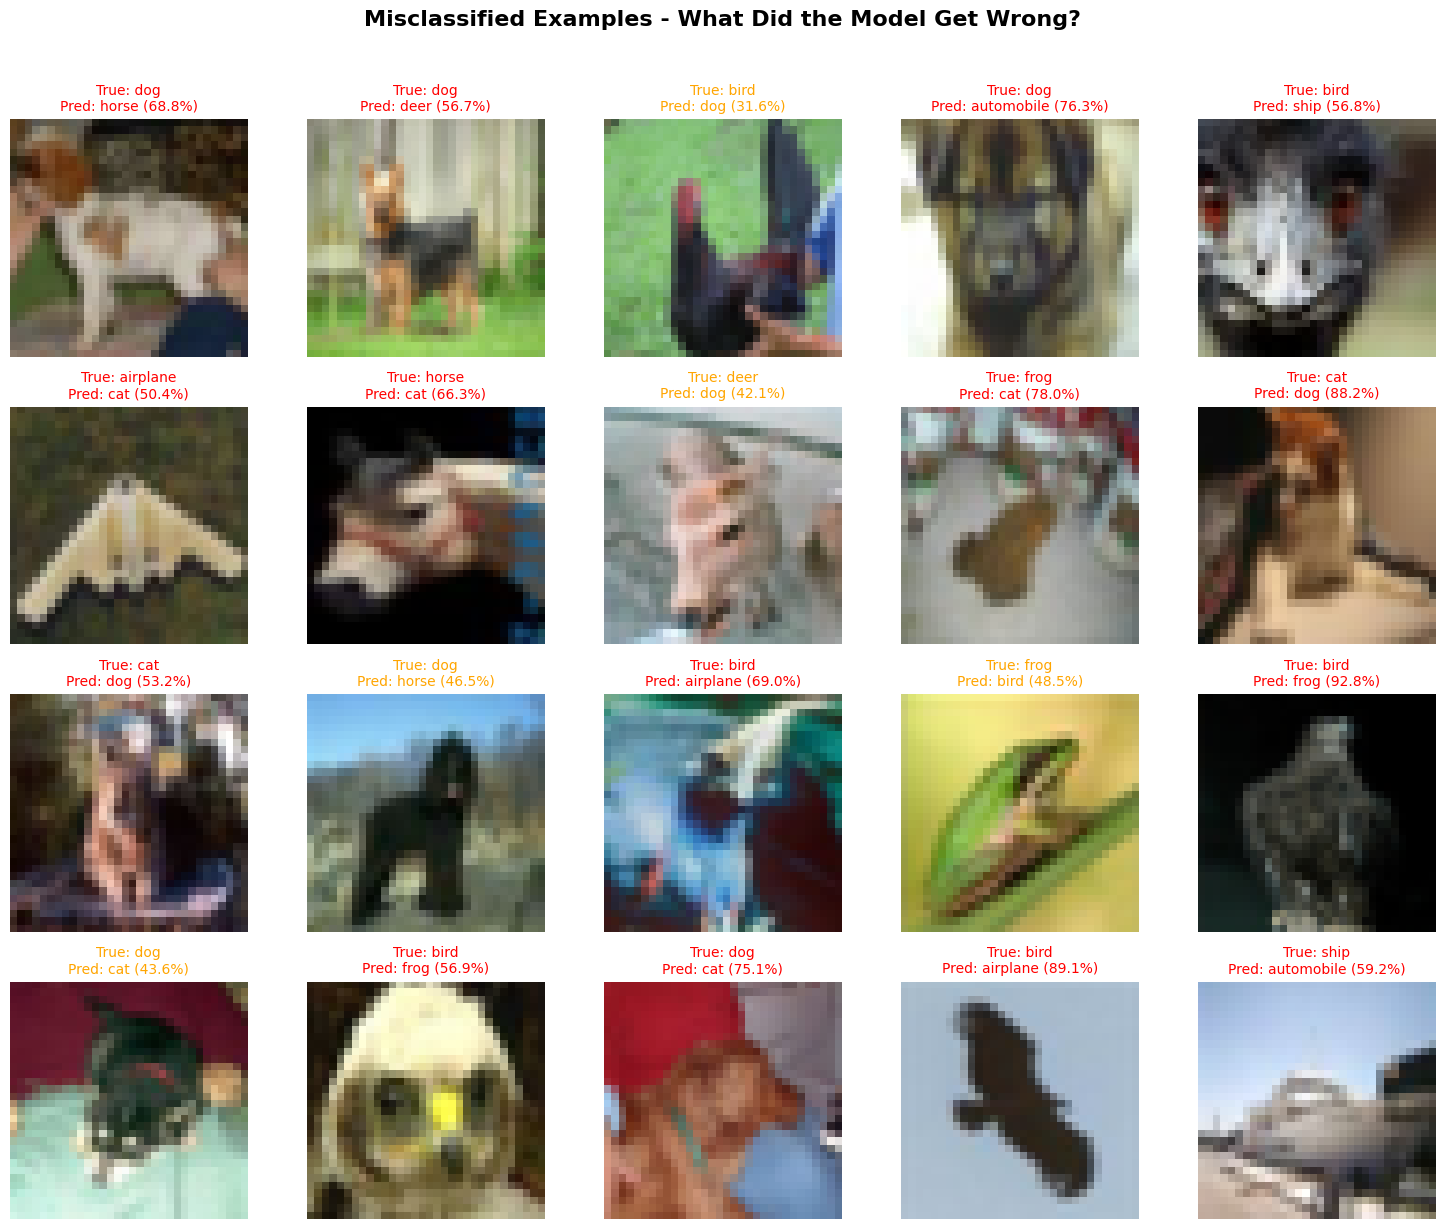


Total misclassified: 1230 out of 10000 (12.30%)


In [13]:
# Find misclassified examples
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Show 20 misclassified images
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.ravel()

for i in range(20):
    idx = incorrect_indices[i]
    axes[i].imshow(X_test[idx])
    axes[i].axis('off')

    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred[idx][y_pred_classes[idx]] * 100

    # Title: True (green) vs Predicted (red)
    title = f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)"
    axes[i].set_title(title, fontsize=10, color='red' if confidence > 50 else 'orange')

plt.suptitle('Misclassified Examples - What Did the Model Get Wrong?',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nTotal misclassified: {len(incorrect_indices)} out of {len(y_test)} ({len(incorrect_indices)/len(y_test)*100:.2f}%)")


/tmp/ipython-input-3866511890.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([correct_confidences, incorrect_confidences],


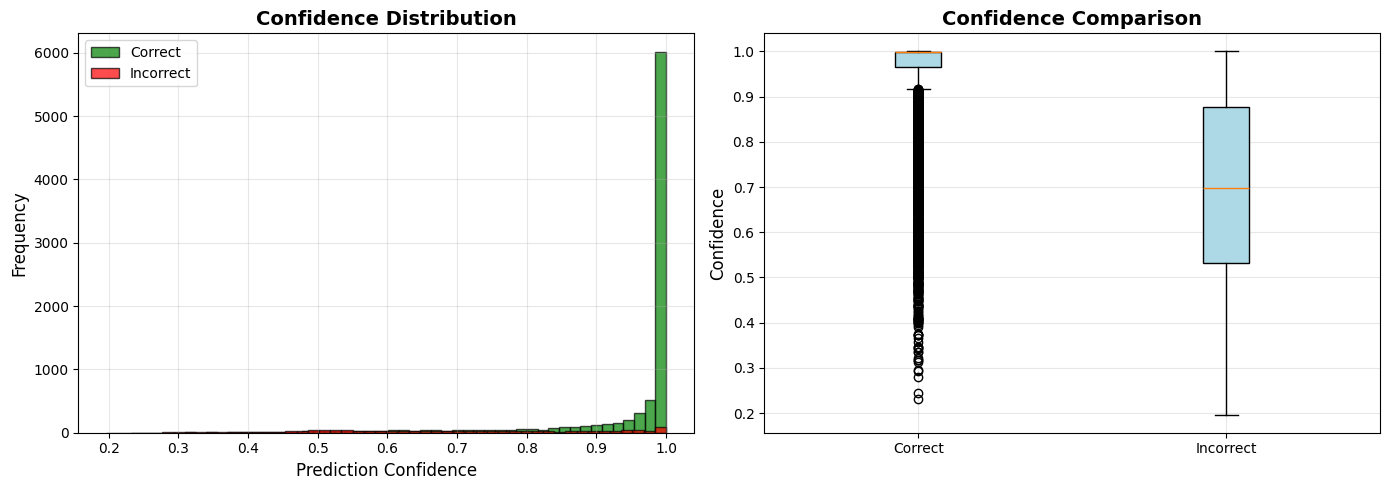

Average confidence (correct): 0.9474
Average confidence (incorrect): 0.6976


In [14]:
# Get max prediction confidence for each sample
confidences = np.max(y_pred, axis=1)
correct_confidences = confidences[y_pred_classes == y_true]
incorrect_confidences = confidences[y_pred_classes != y_true]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(correct_confidences, bins=50, alpha=0.7, label='Correct', color='green', edgecolor='black')
axes[0].hist(incorrect_confidences, bins=50, alpha=0.7, label='Incorrect', color='red', edgecolor='black')
axes[0].set_xlabel('Prediction Confidence', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Confidence Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot([correct_confidences, incorrect_confidences],
                labels=['Correct', 'Incorrect'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[1].set_ylabel('Confidence', fontsize=12)
axes[1].set_title('Confidence Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average confidence (correct): {correct_confidences.mean():.4f}")
print(f"Average confidence (incorrect): {incorrect_confidences.mean():.4f}")


**What the graphs show:** The histogram (left) displays prediction confidence distributions separated by correctness (green = correct, red = incorrect), while the box plot (right) compares confidence levels between correct and incorrect predictions.

**Interpretation:** Correct predictions cluster at very high confidence (>0.95), while incorrect predictions show much lower and more variable confidence (~0.70 median). This demonstrates that the model's confidence is a useful indicator of prediction reliability, though some errors still occur at high confidence levels.

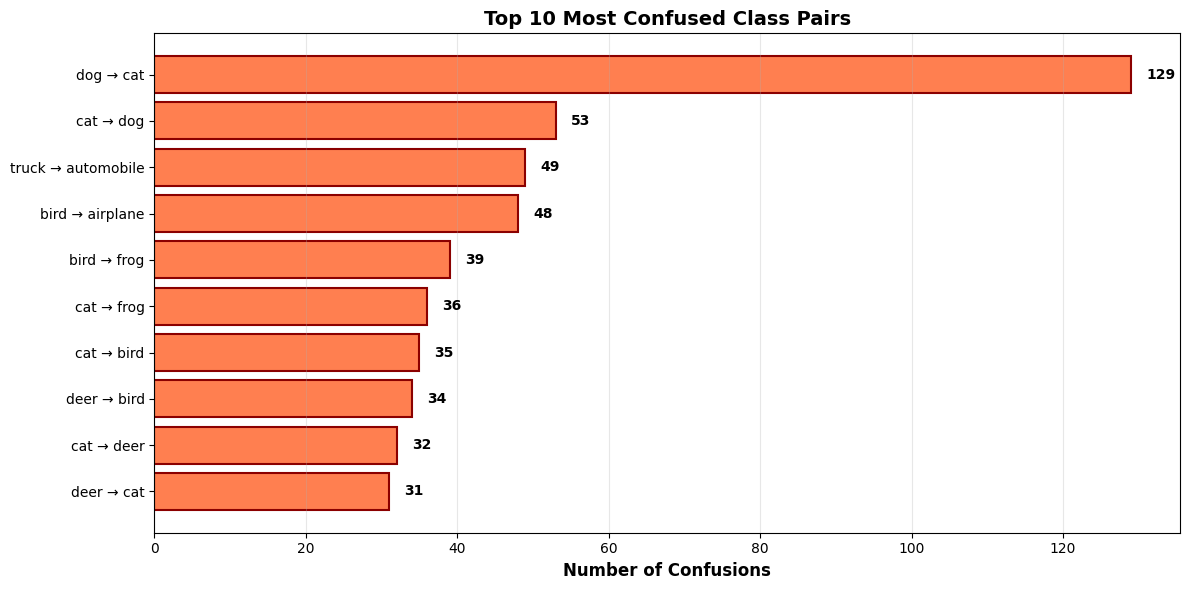

In [15]:
# Find most confused pairs
confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append((class_names[i], class_names[j], cm[i, j]))

# Sort by confusion count
confusion_pairs.sort(key=lambda x: x[2], reverse=True)

# Plot top 10
top_n = 10
labels = [f"{pair[0]} → {pair[1]}" for pair in confusion_pairs[:top_n]]
counts = [pair[2] for pair in confusion_pairs[:top_n]]

plt.figure(figsize=(12, 6))
bars = plt.barh(labels, counts, color='coral', edgecolor='darkred', linewidth=1.5)
plt.xlabel('Number of Confusions', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Most Confused Class Pairs', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', alpha=0.3)

# Add counts on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    plt.text(count + 2, i, str(count), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Graph Interpretation:** The model's most frequent error is confusing dogs with cats (129 instances), followed by the reverse confusion (53 instances). Other common misclassifications involve visually similar classes such as trucks/automobiles (49 instances), birds/airplanes (48 instances), and various animal pairs, indicating the model struggles to distinguish fine-grained differences within similar categories.

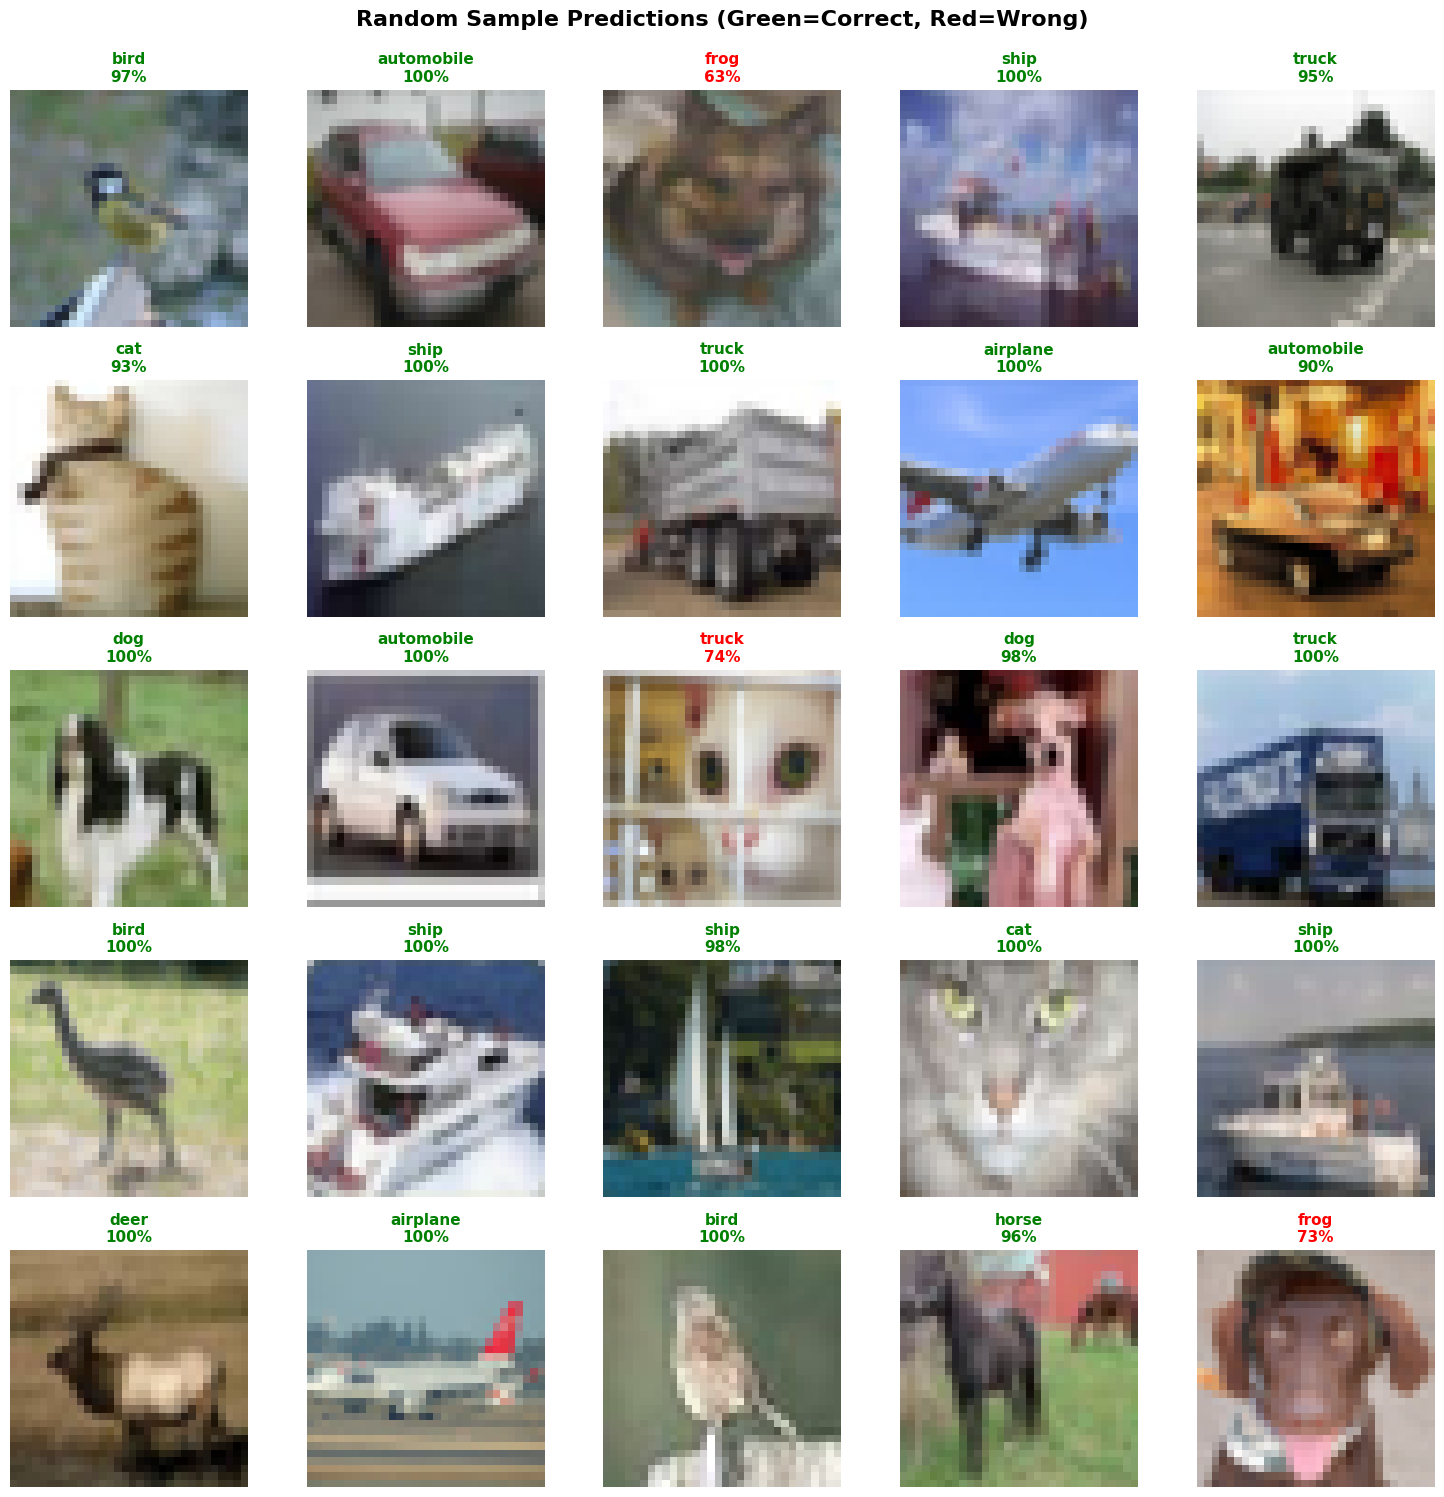

In [16]:
# Show random samples with predictions
np.random.seed(42)
random_indices = np.random.choice(len(X_test), 25, replace=False)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    axes[i].imshow(X_test[idx])
    axes[i].axis('off')

    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred[idx][y_pred_classes[idx]] * 100

    # Green if correct, red if wrong
    is_correct = (y_true[idx] == y_pred_classes[idx])
    color = 'green' if is_correct else 'red'

    title = f"{pred_label}\n{confidence:.0f}%"
    axes[i].set_title(title, fontsize=11, fontweight='bold', color=color)

    # Border
    for spine in axes[i].spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(3)

plt.suptitle('Random Sample Predictions (Green=Correct, Red=Wrong)',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


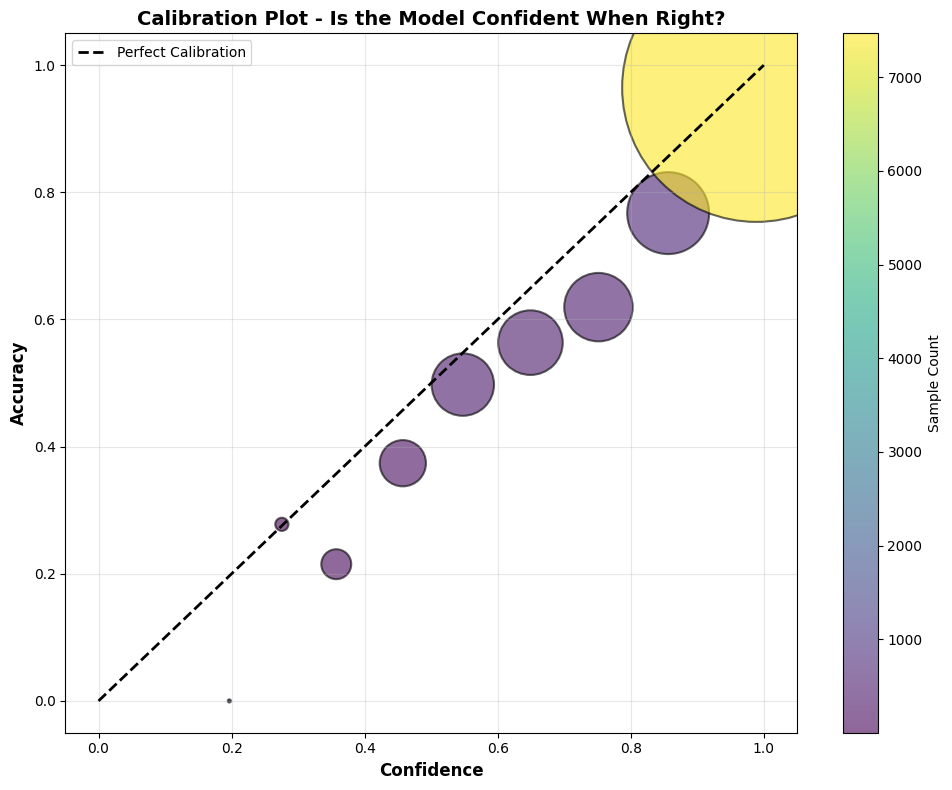

In [17]:
# Bin predictions by confidence
bins = np.linspace(0, 1, 11)  # 0-10%, 10-20%, ..., 90-100%
bin_accuracies = []
bin_confidences = []
bin_counts = []

for i in range(len(bins) - 1):
    mask = (confidences >= bins[i]) & (confidences < bins[i+1])
    if mask.sum() > 0:
        bin_acc = (y_pred_classes[mask] == y_true[mask]).mean()
        bin_conf = confidences[mask].mean()
        bin_accuracies.append(bin_acc)
        bin_confidences.append(bin_conf)
        bin_counts.append(mask.sum())

# Plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
plt.scatter(bin_confidences, bin_accuracies, s=[c*5 for c in bin_counts],
           alpha=0.6, c=bin_counts, cmap='viridis', edgecolors='black', linewidth=1.5)
plt.xlabel('Confidence', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Calibration Plot - Is the Model Confident When Right?', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Sample Count')
plt.tight_layout()
plt.show()


**What the graph shows:** The calibration plot evaluates whether the model's predicted confidence scores align with its actual accuracy.   
- For each prediction, confidence is calculated as the maximum probability across all 10 CIFAR-10 classes: $\text{confidence} = \max(p_1, p_2, ..., p_{10})$.   
- Predictions are then grouped by confidence level, and accuracy is calculated as the proportion of correct predictions within each group. For example, if the model made 10 predictions with ~70% confidence and 7 were correct, the accuracy for that confidence bin would be 0.7.   
- Each bubble represents one confidence bin, with the x-axis showing the model's confidence, the y-axis showing the actual accuracy, and bubble size/color indicating the number of samples.   
- The dashed diagonal line represents perfect calibration, where confidence equals accuracy.

**What we observe:** While the model demonstrates good calibration at high confidence levels (large yellow bubble near the line), it shows overconfidence in the medium-low confidence range, most notably around 35% confidence where predictions fall below the calibration line.